In [1]:
import os
import sys
parent = os.path.realpath(os.path.join(os.path.abspath(''), os.pardir))
sys.path.append(parent)
import numpy as np
from databases.sql_connect import create_connection
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from databases.sql_connect import create_connection


sns.set_theme()
sns.set(context="paper", style="darkgrid", font="Times New Roman")
cm = 1/2.54
DB_CORR = os.path.join(parent,"databases", "TEMPRO_DB220501_Corr_results.db")
assert(os.path.exists(DB_CORR))
FONTSIZE = 8

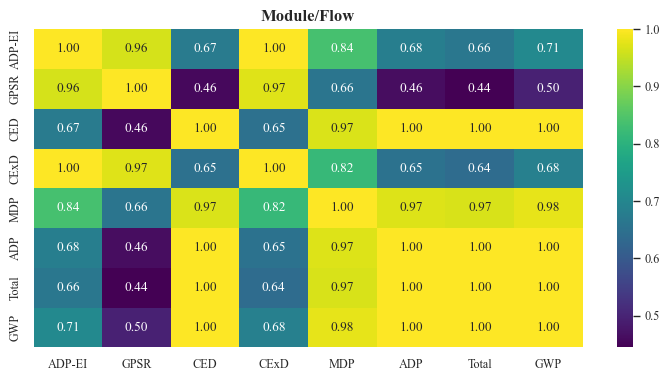

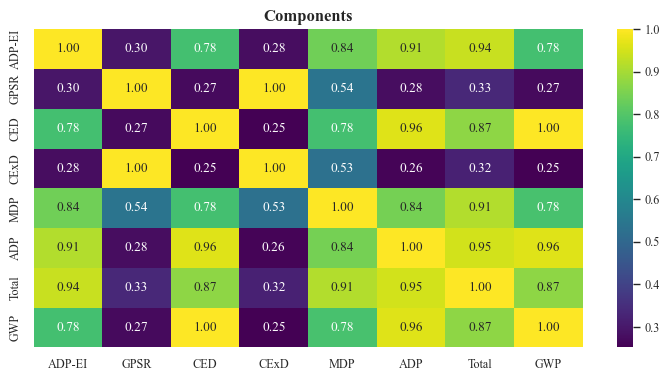

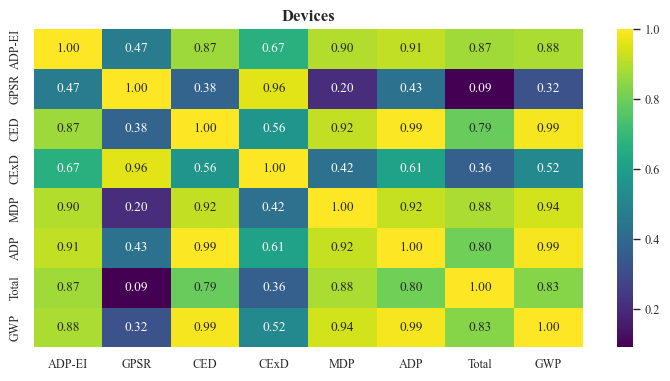

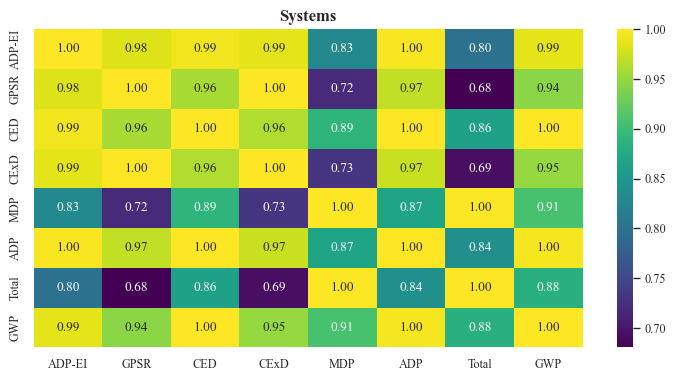

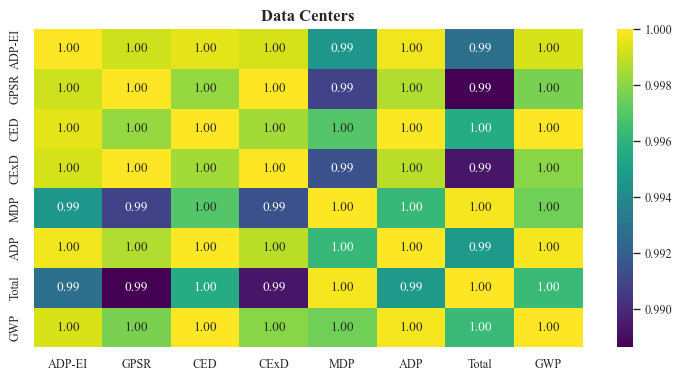

In [5]:
group = 4000

cats = {"EI-Minerals- Total": "ADP-EI",
        "GPR-Minerals- Total": "GPSR",
        "CED - total": "CED",
        "CExD - metals": "CExD",
        "ReCiPe Midpoint (E) - metal depletion (MDP)": "MDP",
        "ADP": "ADP",
        "ReCiPe Endpoint (E - A) - total (total)": "Total",
        "CML-climate change (GWP 100a)": "GWP"}
titles = {
        2000:"Module/Flow",
        3000:"Components",
        4000: "Devices",
        5000: "Systems",
            6000:"Data Centers"}

for group in [2000,3000,4000,5000,6000]:
        conn = create_connection(DB_CORR)
        query = f'SELECT * FROM [{group}LCAResults]'
        df_lca = pd.read_sql_query(query, conn)
        conn.close()
        impacts = df_lca['Category'].unique()
        #df_lca=df_lca[df_lca["ProductSystemID"]>4400]
        df_ = []
        for cat in cats.keys():
                df = df_lca[df_lca["Category"] == cat]
                df.set_index("ProductSystemID", inplace=True)
                df=df[["Result"]]
                df.columns=[cats[cat]]
                df_.append(df)

        df_impacts = pd.concat(df_,axis=1)
        df_impacts.rename(columns=cats)
        df_impacts.head()
        cm = 1/2.54 * 1.5
        fig, ax = plt.subplots(figsize=(15*cm, 7*cm))
        df_heat_map = df_impacts
        ax.set_title(titles[group], fontweight= "bold", fontsize= 12)
        df_corr = df_heat_map.corr()
        sns.heatmap(data=df_corr, cmap="viridis", annot=True, fmt=".2f", ax=ax)
        fig.savefig(f"Correlations\heatmap_{group}.svg", bbox_inches='tight', dpi=600)


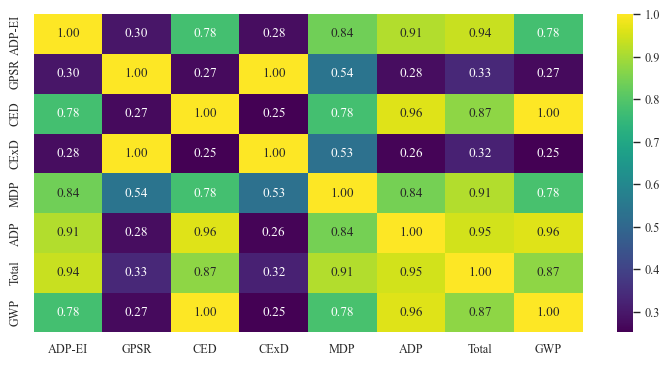

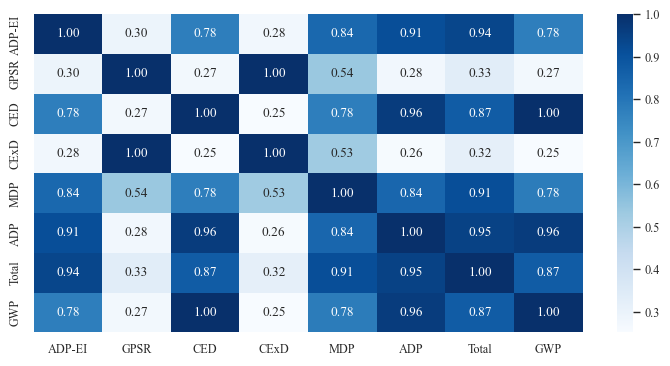

In [3]:
for cmap in ["viridis", "Blues"]:
        group=3000
        conn = create_connection(DB_CORR)
        query = f'SELECT * FROM [{group}LCAResults]'
        df_lca = pd.read_sql_query(query, conn)
        conn.close()
        impacts = df_lca['Category'].unique()
        #df_lca=df_lca[df_lca["ProductSystemID"]>4400]
        df_ = []
        for cat in cats.keys():
                df = df_lca[df_lca["Category"] == cat]
                df.set_index("ProductSystemID", inplace=True)
                df=df[["Result"]]
                df.columns=[cats[cat]]
                df_.append(df)

        df_impacts = pd.concat(df_,axis=1)
        df_impacts.rename(columns=cats)
        df_impacts.head()
        cm = 1/2.54 * 1.5
        fig, ax = plt.subplots(figsize=(15*cm, 7*cm))
        df_heat_map = df_impacts
        df_corr = df_heat_map.corr()
        sns.heatmap(data=df_corr, cmap=cmap, annot=True, fmt=".2f", ax=ax)